In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
diabetes = datasets.load_diabetes()
data, target  = diabetes.data, diabetes.target

In [ ]:
target = MinMaxScaler().fit_transform(target.reshape(-1, 1))

In [ ]:
target = target.reshape(-1)

In [ ]:

import numpy as np
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000, polynomial_degree=1):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []
        self.test_loss = 0.0
        self.polynomial_degree = polynomial_degree

    def fit(self, X_train, y_train, X_test, y_test):
        if self.polynomial_degree > 1:
            X_train = np.hstack((X_train, X_train[:, 0].reshape(-1, 1) ** 2))
            X_test = np.hstack((X_test, X_test[:, 0].reshape(-1, 1) ** 2))

        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted_train = np.dot(X_train, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X_train.T, (y_predicted_train - y_train))
            db = (1 / n_samples) * np.sum(y_predicted_train - y_train)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            loss_train = np.mean((y_predicted_train - y_train) ** 2)
            self.loss_history.append(loss_train)

            y_predicted_test = np.dot(X_test, self.weights) + self.bias
            self.test_loss = np.mean((y_predicted_test - y_test) ** 2)


    def predict(self, X):
        if self.polynomial_degree > 1:
            X = np.hstack((X, X[:, 0].reshape(-1, 1) ** 2))


        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1, shuffle=True)
lr = LinearRegressionScratch(n_iterations=100_000, learning_rate=0.3)

In [ ]:
lr.fit(X_train, y_train, X_test, y_test)

In [ ]:
lr.weights, lr.bias

(array([-1.71884332e-06, -6.82849908e-06, -6.68681024e-06,  8.52467952e-06,
        -7.52565152e-04,  5.88388869e-04,  3.39729369e-04,  1.03412354e-04,
         2.83673968e-04, -6.57482934e-06,  9.99998001e-01]),
 1.000853701596411e-06)

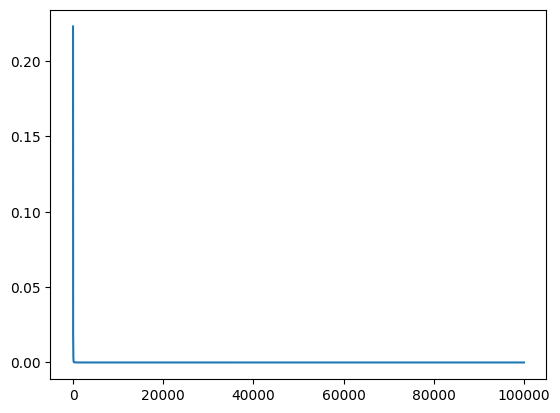

In [ ]:
plt.plot(lr.loss_history)

In [ ]:
from sklearn.metrics import r2_score

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R^2 accuracy for training set: {r2_train}")
print(f"R^2 accuracy for test set: {r2_test}")


R^2 accuracy for training set: 0.9999999996465098
R^2 accuracy for test set: 0.9999999995537148


In [ ]:
lr.test_loss

2.180500059826415e-11

In [ ]:
lr.weights, lr.bias

(array([-1.71884332e-06, -6.82849908e-06, -6.68681024e-06,  8.52467952e-06,
        -7.52565152e-04,  5.88388869e-04,  3.39729369e-04,  1.03412354e-04,
         2.83673968e-04, -6.57482934e-06,  9.99998001e-01]),
 1.000853701596411e-06)

In [ ]:
import pandas as pd

data = pd.DataFrame(data, columns=diabetes.feature_names)
data['target'] = target

In [ ]:
data.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483
